<a href="https://colab.research.google.com/github/ElisNurhidayati/PCVK_Ganjil_2024/blob/main/Week03_ElisNurhidayati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama  : Elis Nurhidayati**

**NIM   : 2241720035**

**Kelas : TI - 3C**

#**[Praktikum Modul 3 – Operasi Citra Sederhana (Linier Brightness, Contrast, Inverse, Logarithmic Brightness, dan Grayscale Image)](https://drive.google.com/file/d/1YsEhTXH5QjqHS-JdKtuMvKLOS379XcVc/view?usp=sharing)**

**TUJUAN**
1. Mahasiswa dapat memahami dan mengimplementasikan Transformasi Linier
Brightness menggunakan Google Colab
2. Mahasiswa dapat memahami dan mengimplementasikan Contrast Citra menggunakan
Google Colab
3. Mahasiswa dapat memahami dan mengimplementasikan Inverse Citra
4. Mahasiswa dapat memahami dan mengimplementasikan Transformasi Logarithmic
Brightness
5. Mahasiswa dapat memahami dan mengimplementasikan jenis-jenis operasi Grayscale

# Praktikum

In [ ]:
# Akses Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import library
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

### Transformasi Linier Brightness

Formula: g(x,y)=f(x,y)+b

g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, b adalah nilai brightness



Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


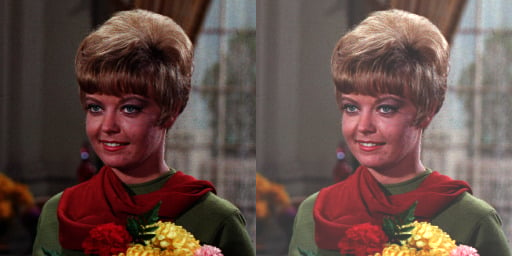

In [ ]:
# Menggunakan for loop
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

ori = cv.imread('/content/drive/MyDrive/Elis - 3C/SMT 5/PCVK_image/woman.jpg')
brightness_img = np.zeros(ori.shape, ori.dtype)

# Akses per pixel
for y in range(ori.shape[0]):
  for x in range(ori.shape[1]):
    for c in range(ori.shape[2]):
      brightness_img[y,x,c] = np.clip(ori[y,x,c]+brightness,0,255) # formula g(x)=f(x)+b

final_frame = cv.hconcat((ori, brightness_img))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


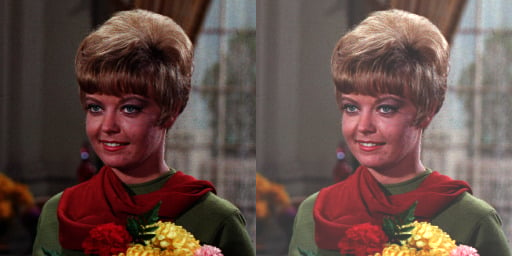

In [ ]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

ori = cv.imread('/content/drive/MyDrive/Elis - 3C/SMT 5/PCVK_image/woman.jpg')
brightness_img = np.zeros(ori.shape, ori.dtype)

# Akses tanpa for loop
brightness_img = cv.convertScaleAbs(ori, beta=brightness)

final_frame = cv.hconcat((ori, brightness_img))
cv2_imshow(final_frame)

# Tugas Praktikum

### 1. Inverse Color

Formula: g(x) = 255 − f(x) , dimana g(x,y) adalah citra negative, dan f(x,y) adalah citra asli

Mengubah warna menjadi negatif
------------------------------


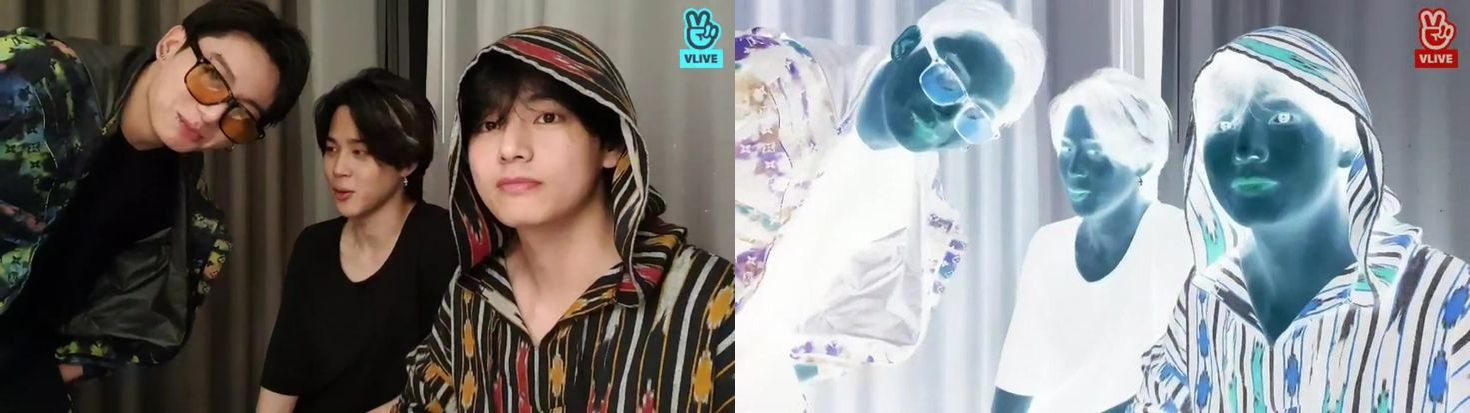

In [ ]:
print('Mengubah warna menjadi negatif')
print('------------------------------')
trio = cv.imread('/content/drive/MyDrive/Elis - 3C/SMT 5/PCVK_image/trio.jfif') # membaca gambar
inverse = trio.copy() # membuat salinan gambar asli untuk gambar manipulasi
for y in range(trio.shape[0]): # iterasi baris gambar
  for x in range(trio.shape[1]): # iterasi kolom gambar
    for c in range(trio.shape[2]): # iterasi warna (R, G, B) di setiap pixel
      inverse[y,x,c] = np.clip(255-trio[y,x,c],0,255) # formula untuk membalikkan warna gambar yaitu g(x)=255-f(x)

final_frame = cv.hconcat((trio, inverse)) # menggabungkan 2 gambar menjadi 1
cv2_imshow(final_frame) # menampilkan gambar

### 2. Transformasi Constrast

Formula: g(x, y) = a ∗ f(x, y) + b , dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah
nilai pixel asli, a adalah nilai contrast, dan b adalah nilai brightness.

Selain formula di atas, transformasi contrast dapat dilakukan dengan menghitung Contrast
Correction Factor menggunakan rumus berikut:
F =
259(C + 255)
255(259 − C)

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


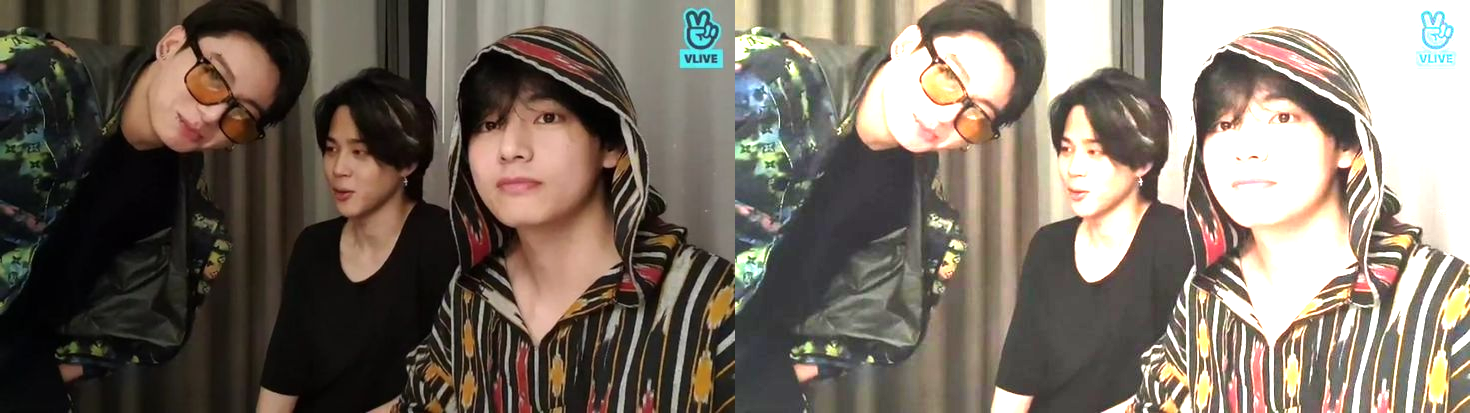

In [ ]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try: # untuk menangani error
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: ')) # membuat inputan user
  contrast = int(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError: # menjalankan kode ketika error
  print('Error, not a number') # menampilkan message, penanda error

constrast_img = trio.copy()  # membuat salinan gambar asli untuk gambar manipulasi

for y in range(trio.shape[0]): # iterasi baris gambar
  for x in range(trio.shape[1]): # iterasi kolom gambar
    for c in range(trio.shape[2]): # iterasi warna (R, G, B) di setiap pixel
      constrast_img[y,x,c] = np.clip(contrast*trio[y,x,c]+brightness,0,255) # formula untuk memanipulasi kontras pada gambar yaitu g(x,y)=a*f(x,y)+b

final_frame = cv.hconcat((trio, constrast_img)) # menggabungkan 2 gambar menjadi 1
cv2_imshow(final_frame) # menampilkan gambar

### 3. Transformasi Logarithmic Brightness

Formula: s = c ∗ log(1 + r)

dimana:

c : konstanta

r : nilai grey-level citra input

s : nilai grey-level citra output

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


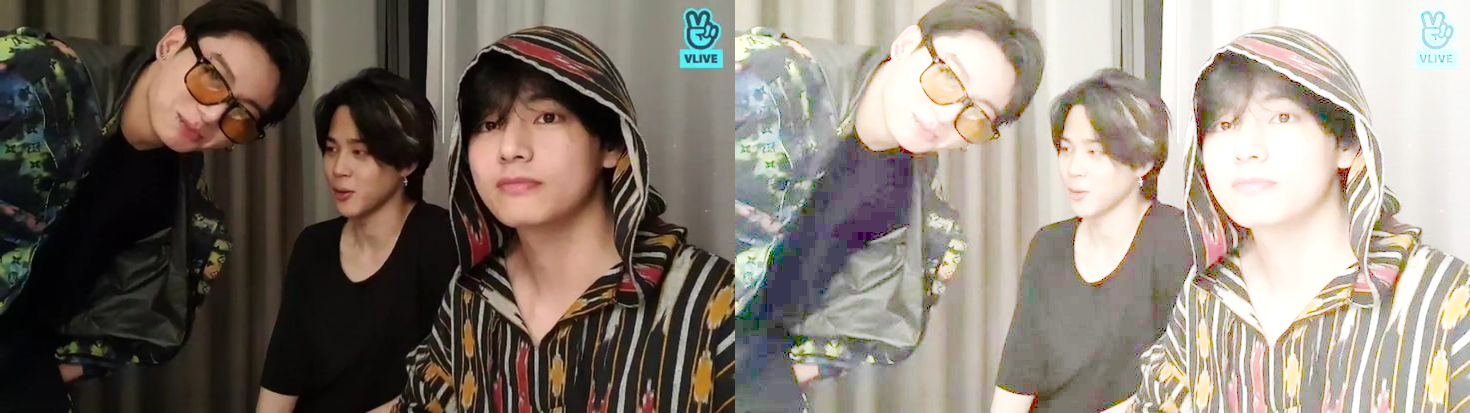

In [ ]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')
try: # untuk menangani error
  brightness = int(input('Masukkan nilai kecerahan: ')) # membuat inputan user
except ValueError: # menjalankan kode ketika error
  print('Error, not a number') # menampilkan message, penanda error

brightness_img = trio.copy()  # membuat salinan gambar asli untuk gambar manipulasi

for y in range(trio.shape[0]): # iterasi baris gambar
  for x in range(trio.shape[1]): # iterasi kolom gambar
    for c in range(trio.shape[2]): # iterasi warna (R, G, B) di setiap pixel
      r = trio[y,x,c] # nilai grey-level input gambar
      brightness_img[y,x,c] = np.clip(brightness*np.log(1+r),0,255) # formula untuk logarithmic brightness yaitu s=c*log(1+r)

final_frame = cv.hconcat((trio, brightness_img)) # menggabungkan 2 gambar menjadi 1
cv2_imshow(final_frame) # menampilkan gambar

### 4. Transformasi Grayscale
**a. Averaging**

Grayscale(avg) = (R + G + B) / 3

Grayscale Average
--------------------------------------------------------


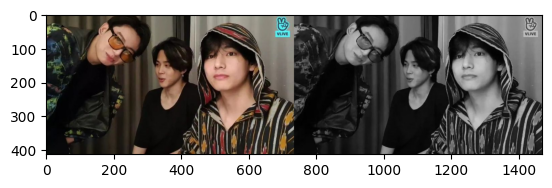

In [ ]:
print('Grayscale Average')
print('--------------------------------------------------------')

# Membaca Image
trio = cv.imread('/content/drive/MyDrive/Elis - 3C/SMT 5/PCVK_image/trio.jfif')
# merubah color dari BGR ke RBG
trio = cv.cvtColor(trio, cv.COLOR_BGR2RGB)

# membuat array dengan range yang sama dengan gambar
grey_scale_avg = np.zeros(trio.shape, trio.dtype)

# Range Tinggi gambar
for y in range(trio.shape[0]):
  # Range Lebar gambar
  for x in range(trio.shape[1]):
    # merubah RGB menjadi grayscale dengan rumus Average
    grey_scale_avg[y,x] = np.sum(trio[y, x]) / 3

# Menggabungkan 2 gambar menjadi 1
final_gray_avg = cv.hconcat((trio,grey_scale_avg))
# menampilkan gambar
plt.imshow(final_gray_avg)

**b. Lightness**

Grayscale(Lightness) = (max[R, G, B] + min[R, G, B]) / 2

Grayscale Lightness
--------------------------------------------------------


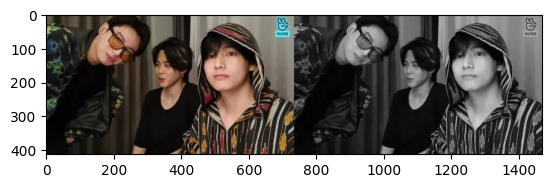

In [ ]:
print('Grayscale Lightness')
print('--------------------------------------------------------')

# Membaca Image
trio = cv.imread('/content/drive/MyDrive/Elis - 3C/SMT 5/PCVK_image/trio.jfif')
# merubah color dari BGR ke RBG
trio = cv.cvtColor(trio, cv.COLOR_BGR2RGB)

# membuat array dengan range yang sama dengan gambar
grey_scale_light = np.zeros(trio.shape, trio.dtype)

# Range Tinggi gambar
for y in range(trio.shape[0]):
  # Range Lebar gambar
  for x in range(trio.shape[1]):
    # merubah RGB menjadi grayscale dengan rumus Lightness
    grey_scale_light[y,x] = np.mean([np.max(trio[y, x]), np.min(trio[y, x])])

# Menggabungkan 2 gambar menjadi 1
final_gray_light = cv.hconcat((trio, grey_scale_light))
# menampilkan gambar
plt.imshow(final_gray_light)

**c. Luminance**

Grayscale(Luminance) = 0.21R + 0.72G + 0.07B

Grayscale Luminance
--------------------------------------------------------


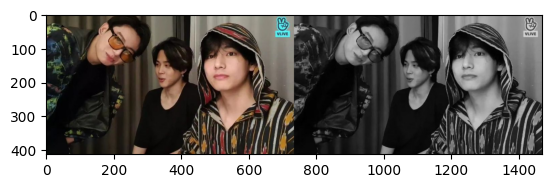

In [ ]:
print('Grayscale Luminance')
print('--------------------------------------------------------')

# Membaca Image
trio = cv.imread('/content/drive/MyDrive/Elis - 3C/SMT 5/PCVK_image/trio.jfif')
# merubah color dari BGR ke RBG
trio = cv.cvtColor(trio, cv.COLOR_BGR2RGB)

# membuat array dengan range yang sama dengan gambar
grey_scale_lum = np.zeros(trio.shape, trio.dtype)

# Range Tinggi gambar
for y in range(trio.shape[0]):
  # Range Lebar gambar
  for x in range(trio.shape[1]):
    # merubah RGB menjadi grayscale dengan rumus Luminance
    grey_scale_lum[y,x] = int(0.21 * trio[y, x][0] + 0.72 * trio[y, x][1] + 0.07 * trio[y, x][2])

# Menggabungkan 2 gambar menjadi 1
final_gray_lumin = cv.hconcat((trio, grey_scale_lum))
# menampilkan gambar
plt.imshow(final_gray_lumin)

### Grayscale

Merubah warna lain menjadi grayscale kecuali warna Merah

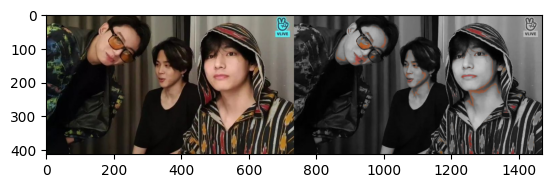

In [37]:
# Membaca Image
trio = cv.imread('/content/drive/MyDrive/Elis - 3C/SMT 5/PCVK_image/trio.jfif')
# merubah color dari BGR ke RBG
trio = cv.cvtColor(trio, cv.COLOR_BGR2RGB)

# membuat array dengan range yang sama dengan gambar
grey_scale = np.zeros(trio.shape, trio.dtype)

# Range Tinggi gambar
for y in range(trio.shape[0]):
  # Range Lebar gambar
  for x in range(trio.shape[1]):
    # Menguraikan warna RGB
    R, G, B = trio[y, x]
    # jika RGB masih dalam range warna merah
    if (R >= 129 and R <= 255) and (G >= 0 and G <= 100) and (B >= 0 and B <= 100):
      # warna tetap
      grey_scale[y, x] = trio[y, x]
    else:
      # jadikan warna greyscale
      grey_scale[y, x] = np.mean(trio[y, x])

# Menggabungkan 2 gambar menjadi 1
final_red_color = cv.hconcat((trio, grey_scale))
# menampilkan gambar
plt.imshow(final_red_color)